In [1]:
import os
from os.path import exists
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import image_processing

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

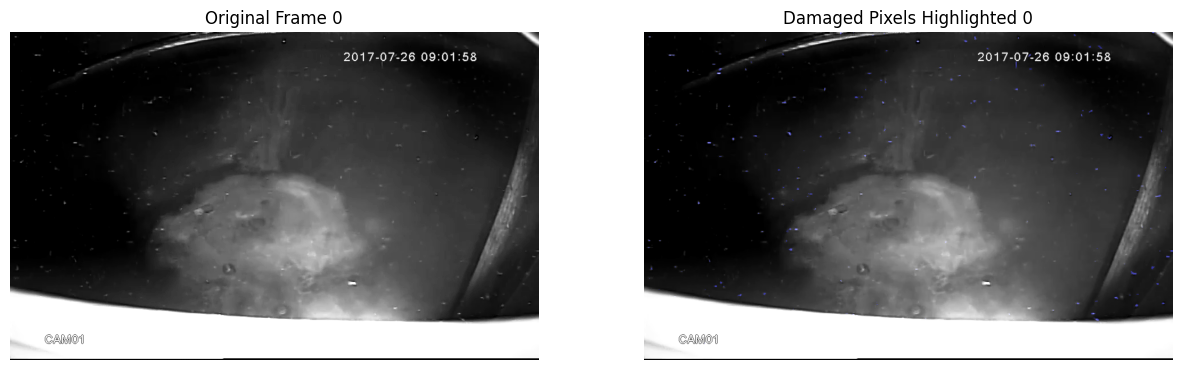

Frame 0: 1213 damaged pixels detected.


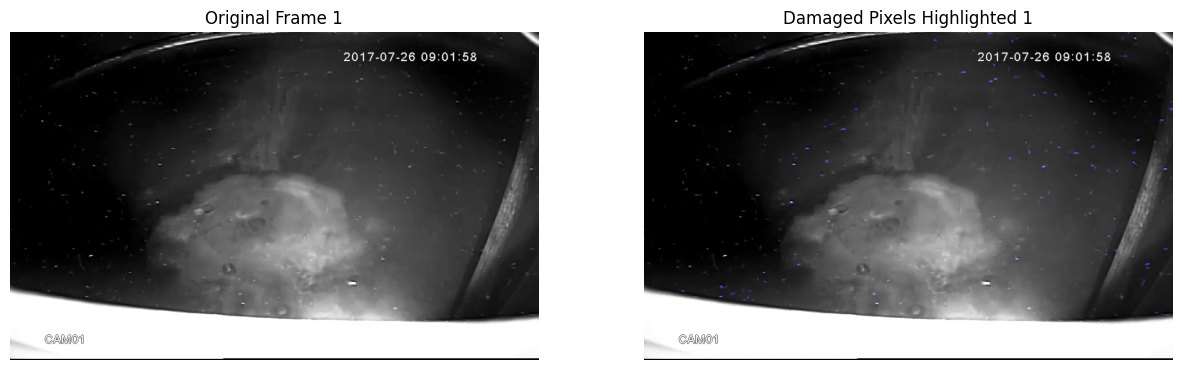

Frame 1: 1753 damaged pixels detected.


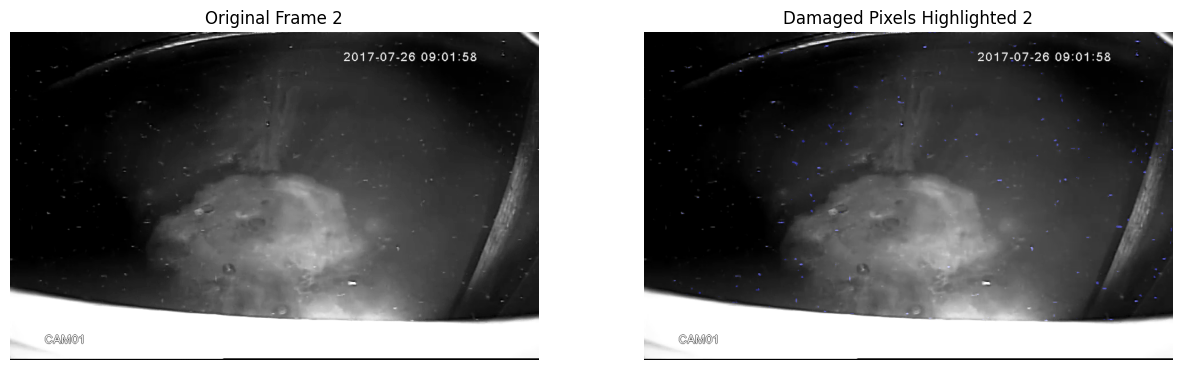

Frame 2: 1528 damaged pixels detected.


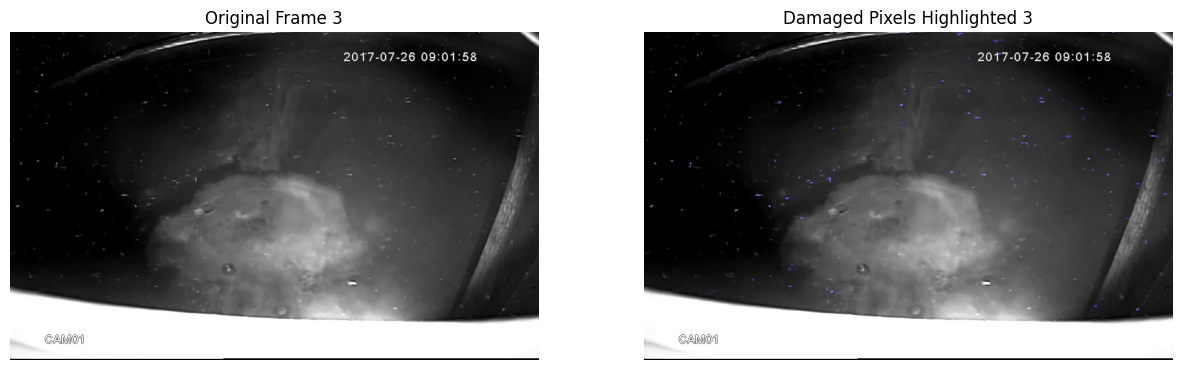

Frame 3: 1421 damaged pixels detected.


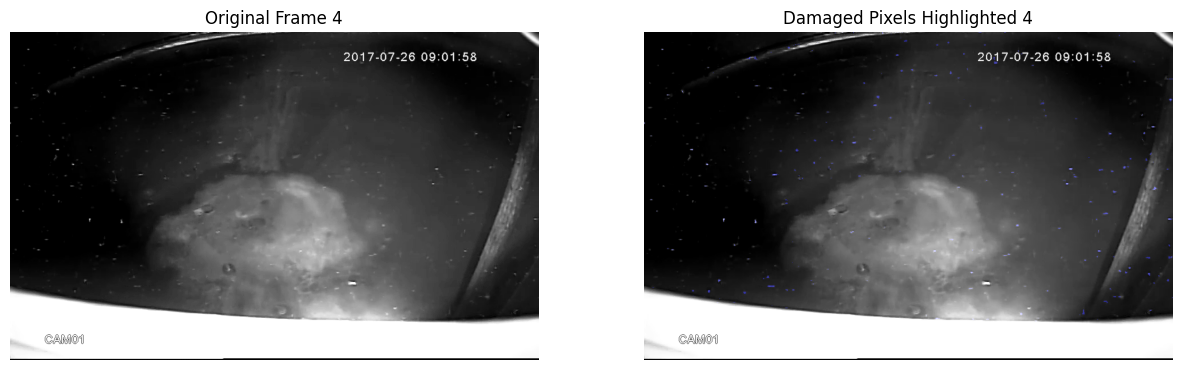

Frame 4: 1404 damaged pixels detected.
159
159
159


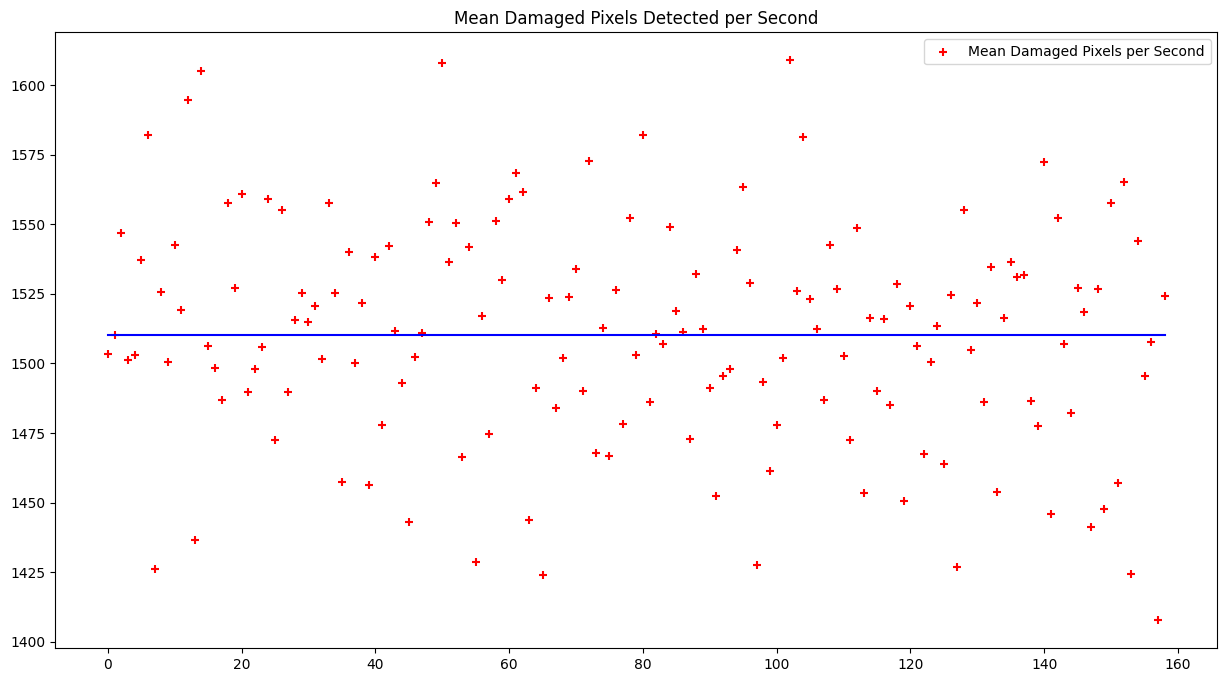

In [2]:
# def detect_damaged_pixels(video_url, video_filename, num_frames=20, threshold_value=50, max_frame_duration=10, min_area=1, max_area=10):
#     # Download video
#     urlretrieve(video_url, video_filename)

#     if not os.path.exists(video_filename):
#         print("File download failed.")
#         return

#     cap = cv2.VideoCapture(video_filename)
#     if not cap.isOpened():
#         print("Error: Could not open video.")
#         return

#     frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#     frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

#     hot_pixel_count_history = []
#     grey_frame_history = []

#     # Create a background subtractor for motion tracking
#     subtractor = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=False)

#     # Process frames
#     for _ in range(num_frames):
#         ret, frame = cap.read()
#         if not ret:
#             break

#         # Convert frame to grayscale
#         grey_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#         grey_frame_history.append(grey_image)

#         # Use background subtractor to detect changes from the background
#         foreground_mask = subtractor.apply(grey_image)

#         # Refine mask using morphological operations to reduce noise
#         kernel = np.ones((3, 3), np.uint8)  # Slightly larger kernel to remove noise
#         foreground_mask = cv2.morphologyEx(foreground_mask, cv2.MORPH_OPEN, kernel)

#         # Connected components to detect pixel groups
#         num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(foreground_mask)

#         # Filter components by area (removing regions that are too large or too small)
#         for i in range(1, num_labels):
#             area = stats[i, cv2.CC_STAT_AREA]
#             if area < min_area or area > max_area:
#                 foreground_mask[labels_im == i] = 0

#         # Append the refined mask to track across frames
#         hot_pixel_count_history.append(foreground_mask)

#     # Initialize a pixel occurrence tracker
#     pixel_occurrences = np.zeros_like(grey_frame_history[0], dtype=np.uint8)

#     # Track occurrences of pixels detected across frames
#     for mask in hot_pixel_count_history:
#         pixel_occurrences[mask > 0] += 1

#     # Remove pixels that persist for too many frames (likely noise)
#     duration_mask = (pixel_occurrences <= max_frame_duration).astype(np.uint8) * 255

#     # Combine hot pixel masks across frames
#     combined_hot_pixel_mask = np.zeros_like(hot_pixel_count_history[0])
#     for mask in hot_pixel_count_history:
#         combined_hot_pixel_mask = cv2.bitwise_or(combined_hot_pixel_mask, mask)

#     # Final damaged pixel mask (excluding persistent pixels)
#     damaged_pixels_mask = cv2.bitwise_and(combined_hot_pixel_mask, duration_mask)

#     # Count the number of damaged pixels
#     damaged_pixel_count = cv2.countNonZero(damaged_pixels_mask)

#     # Visualize the damaged pixels on the first frame
#     output_image = grey_frame_history[0].copy()
#     output_image_colored = cv2.cvtColor(output_image, cv2.COLOR_GRAY2BGR)
#     output_image_colored[damaged_pixels_mask > 0] = [0, 0, 255]  # Highlight damaged pixels in red

#     # Display the results
#     plt.figure(figsize=(20, 10))
#     plt.subplot(1, 2, 1)
#     plt.title('Original Frame')
#     plt.imshow(grey_frame_history[0], cmap='gray')
#     plt.subplot(1, 2, 2)
#     plt.title('Frame with Detected Damaged Pixels')
#     plt.imshow(cv2.cvtColor(output_image_colored, cv2.COLOR_BGR2RGB))
#     plt.show()

#     print(f"Number of damaged pixels detected: {damaged_pixel_count}")

# Example usage
video_url = 'https://www.dropbox.com/scl/fi/gr4bxigggxjq7ix0ip7co/11_01_H_170726081325_460000.avi?rlkey=5p2y97bixslqnr23bwedp3a21&st=8t2scn3s&dl=1'
video_filename = '11_01_H_170726081325_460000.avi'

counts1 = image_processing.detect_damaged_pixels(video_url, video_filename)
dps1 = image_processing.damaged_pixels_per_second(counts1)

In [3]:
#image_processing.process_all_frames(video_url, video_filename)

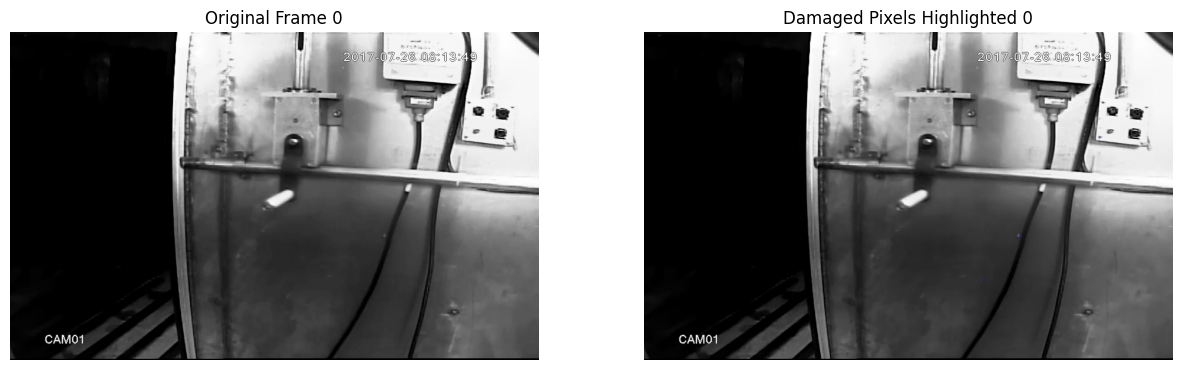

Frame 0: 143 damaged pixels detected.


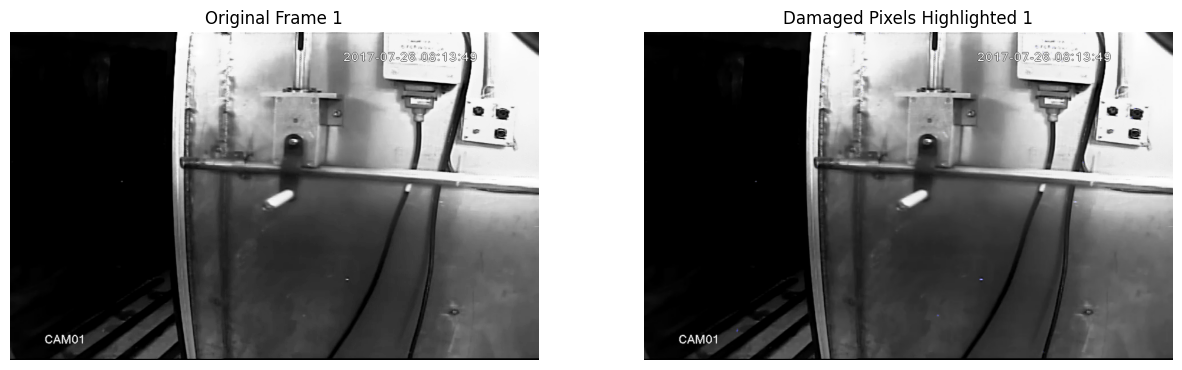

Frame 1: 212 damaged pixels detected.


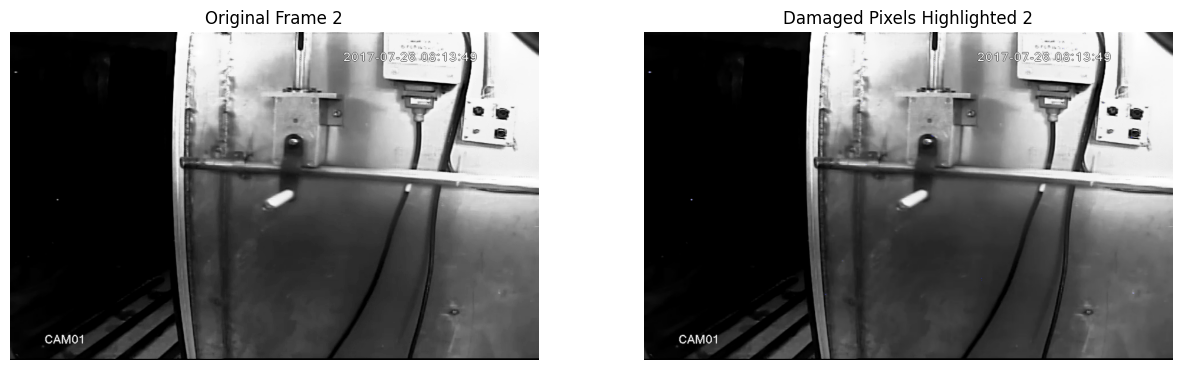

Frame 2: 111 damaged pixels detected.


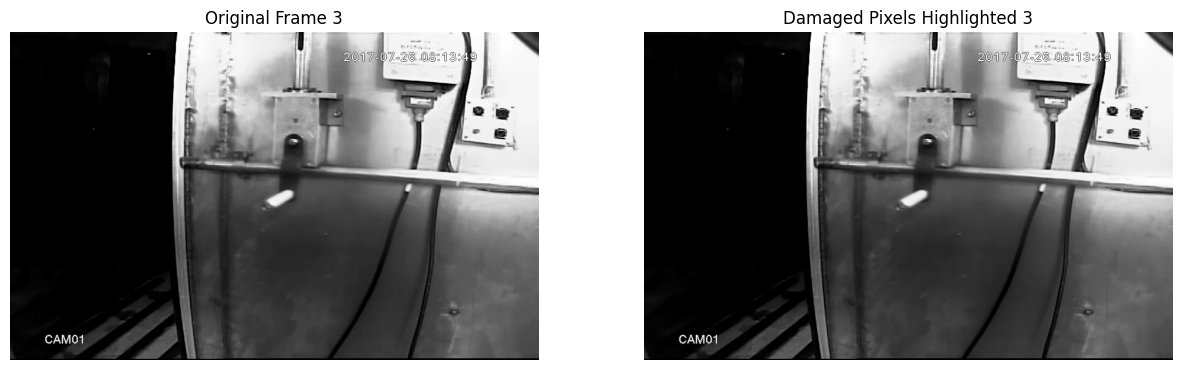

Frame 3: 192 damaged pixels detected.


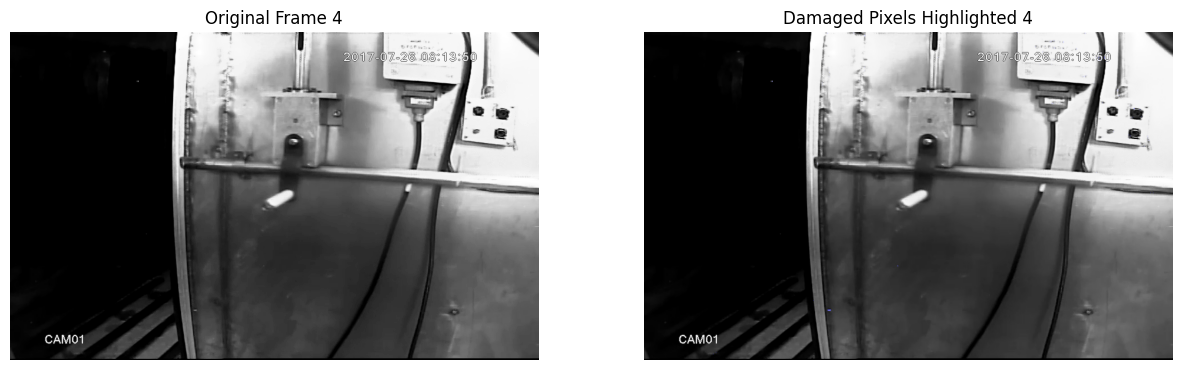

Frame 4: 223 damaged pixels detected.
134
134
134


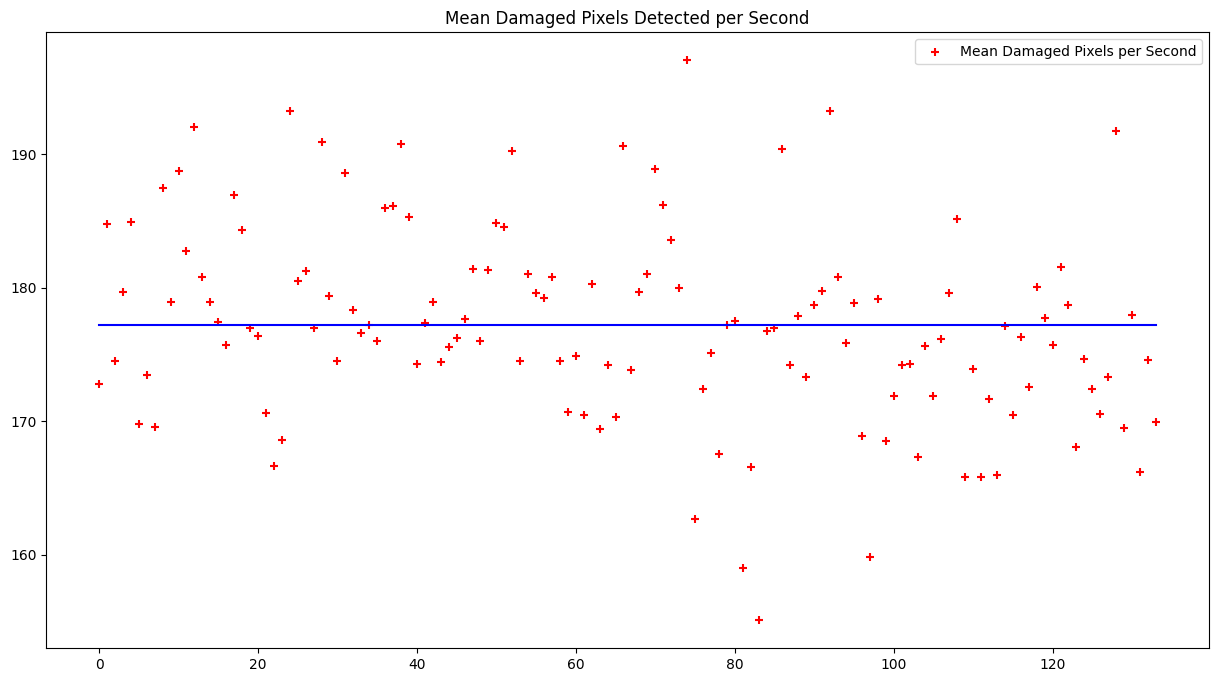

In [4]:
video2_url = 'https://www.dropbox.com/scl/fi/hshn3wdv8707wr5o54dp6/11_01_H_170726081325-Trim.avi?rlkey=91065q200ylitptj5i3numuwc&st=yjbtn2sa&dl=1'
video2_filename = '11_01_H_170726081325 - Trim.avi'

counts2 = image_processing.detect_damaged_pixels(video2_url, video2_filename)
dps2 = image_processing.damaged_pixels_per_second(counts2)

In [5]:
#trying the entire video

# full_video_url = 'https://www.dropbox.com/scl/fi/dj67nxnvrgnjqa3xuc2d5/11_01_H_170726081325-highrad-Trim.avi?rlkey=we4lq5ehix2ms9vsr8vrs0v5a&st=r8qza9th&dl=1'
# full_video_filename = '11_01_H_170726081325 - highrad Trim.avi'

# full_pixels = image_processing.detect_damaged_pixels(full_video_url, full_video_filename, plot = True)

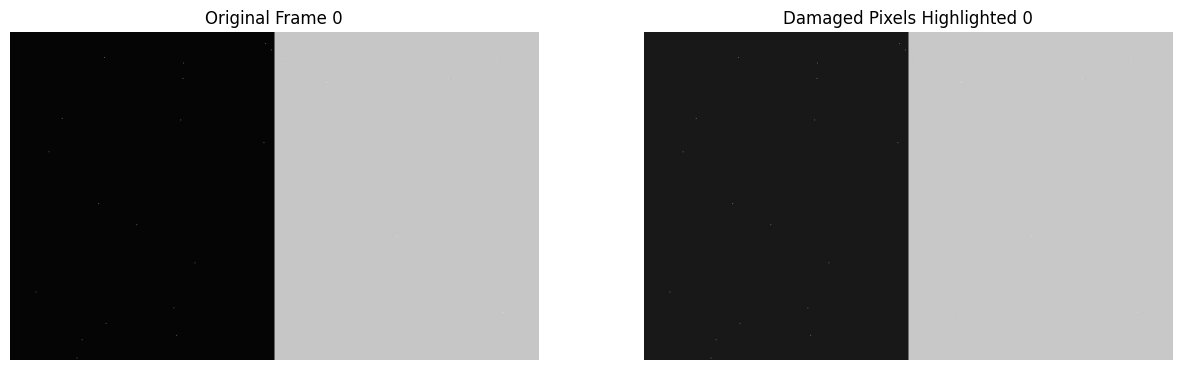

Frame 0: 25 damaged pixels detected.


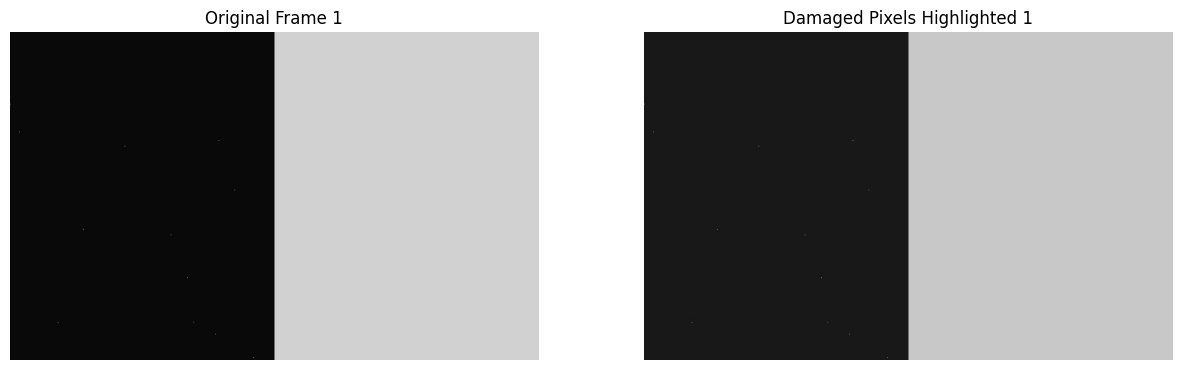

Frame 1: 12 damaged pixels detected.


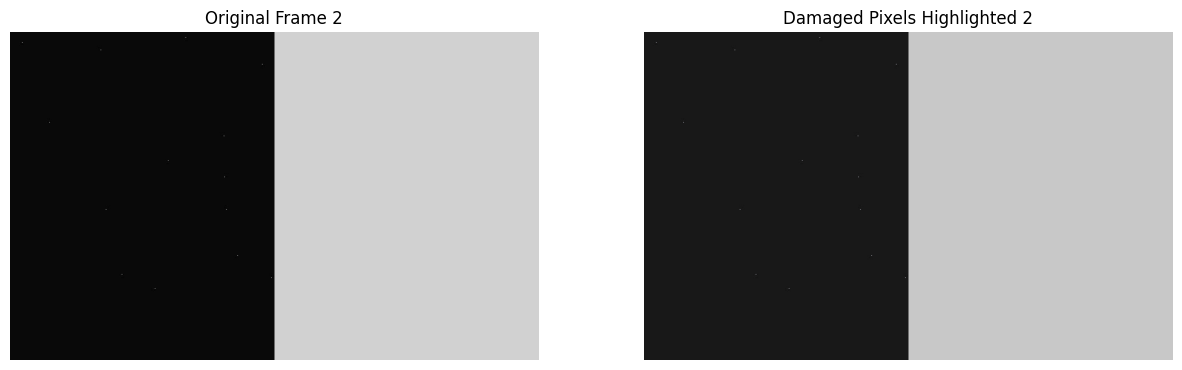

Frame 2: 14 damaged pixels detected.


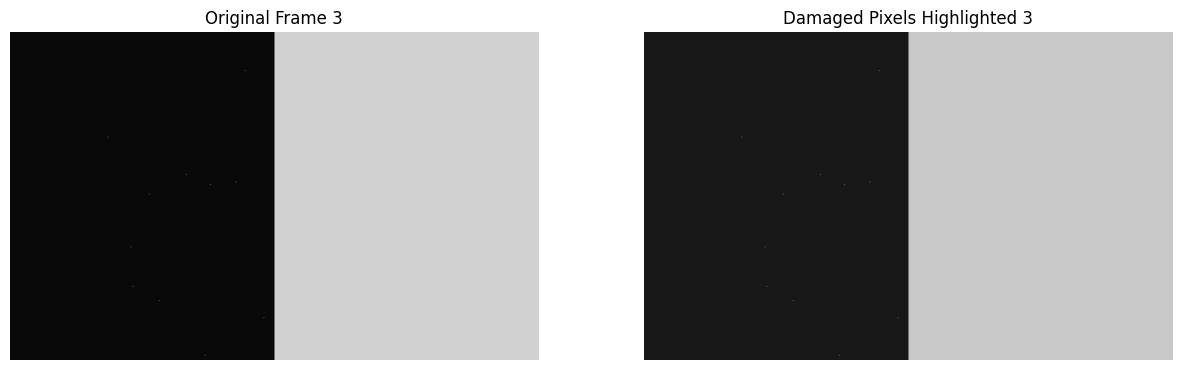

Frame 3: 11 damaged pixels detected.


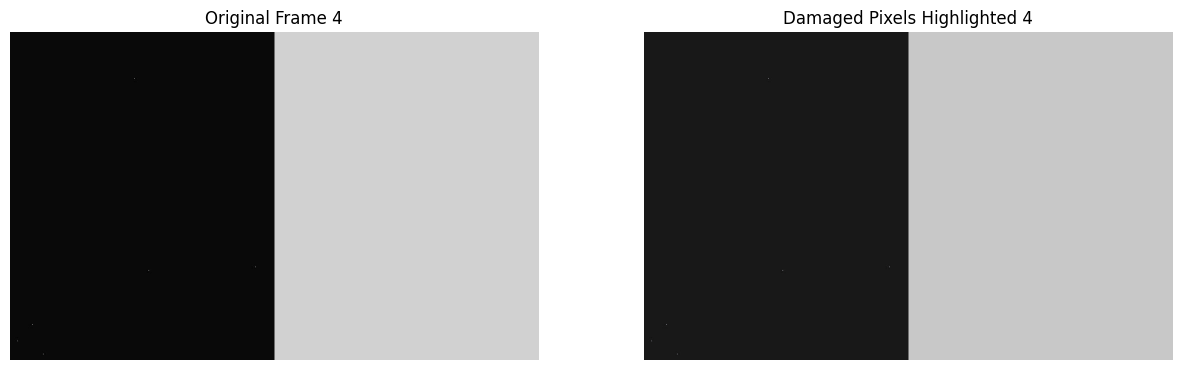

Frame 4: 6 damaged pixels detected.


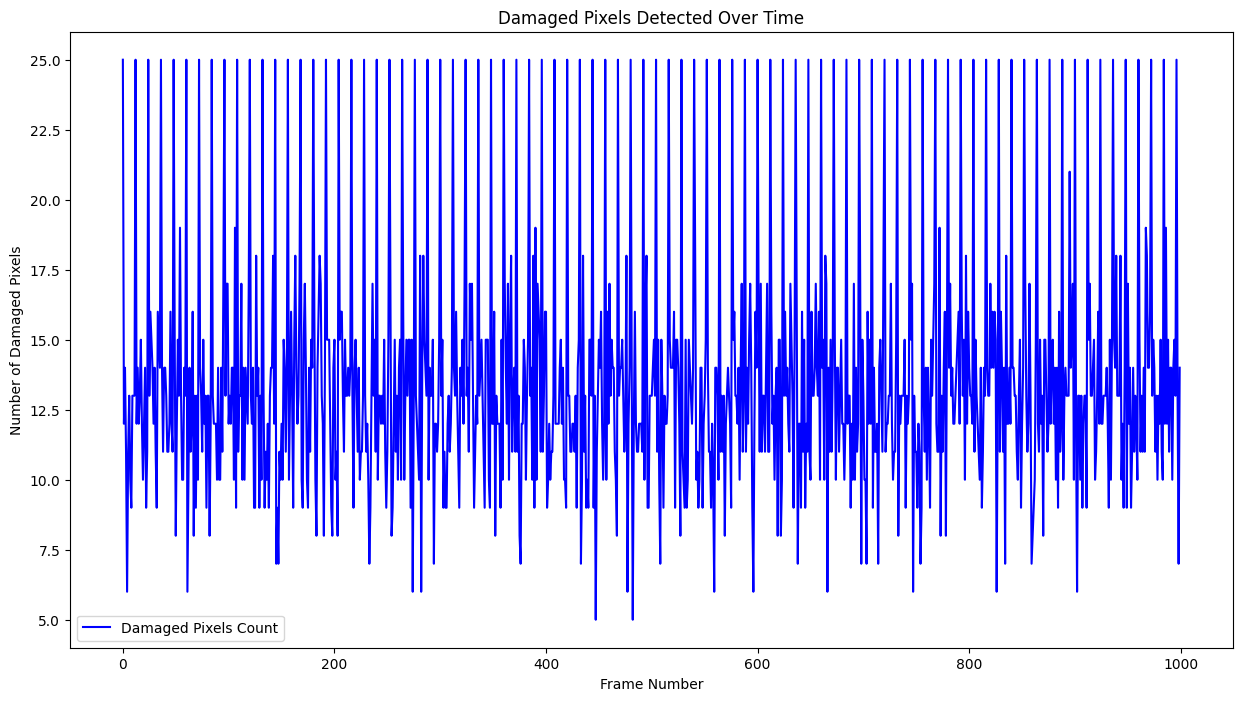

[np.int64(25), np.int64(12), np.int64(14), np.int64(11), np.int64(6), np.int64(11), np.int64(13), np.int64(10), np.int64(9), np.int64(13), np.int64(13), np.int64(13), np.int64(25), np.int64(12), np.int64(14), np.int64(12), np.int64(13), np.int64(15), np.int64(12), np.int64(10), np.int64(12), np.int64(14), np.int64(9), np.int64(11), np.int64(25), np.int64(13), np.int64(16), np.int64(15), np.int64(14), np.int64(12), np.int64(14), np.int64(11), np.int64(9), np.int64(16), np.int64(15), np.int64(14), np.int64(25), np.int64(14), np.int64(11), np.int64(14), np.int64(14), np.int64(13), np.int64(11), np.int64(11), np.int64(12), np.int64(16), np.int64(12), np.int64(11), np.int64(25), np.int64(15), np.int64(8), np.int64(12), np.int64(15), np.int64(13), np.int64(19), np.int64(13), np.int64(10), np.int64(10), np.int64(14), np.int64(13), np.int64(25), np.int64(6), np.int64(10), np.int64(14), np.int64(11), np.int64(12), np.int64(16), np.int64(8), np.int64(13), np.int64(9), np.int64(13), np.int64(10),

In [6]:
test_video = image_processing.create_test_video()
test_counts = image_processing.detect_damaged_pixels(None, 'test_video.avi', plot = True)
print(test_counts)